In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib # 한글 폰트 깨짐 방지
import os
import numpy as np
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_rows", None)  # 행 전부 보기
pd.set_option("display.max_columns", None)  # 열 전부 보기
pd.set_option("display.width", 1000)  # 가로 폭 조절

In [3]:
# --- 설정 ---
# 파일 경로를 설정합니다.
# 이 스크립트를 프로젝트 루트 디렉토리(woogawooga_project)에서 실행한다고 가정합니다.
file_path = os.path.join("../../dataset", "일반통화대화통합.csv")



'../../dataset\일반통화대화통합.csv' 파일을 읽는 중입니다...
파일을 성공적으로 읽었습니다.
동일한 'file_name'을 기준으로 텍스트를 합치는 중입니다...
글자 수 계산을 완료했습니다.

--- 글자 수 기술 통계 ---
count    11019.000000
mean       915.924676
std       2248.047690
min          3.000000
25%        298.000000
50%        458.000000
75%        807.000000
max      35792.000000
Name: text_length, dtype: float64
-------------------------

--- 글자 수가 가장 적은 상위 5개 파일 ---
                                             file_name  text_length
203  2_0232G2A6_0234G2A4_T1_2D08T0359C000001_001055...            3
299  2_0400G2A4_0399G2A4_T1_2D06T0242C000002_001696...            8
78   2_0053G1A2_0052G1A3_T1_2D04T0155C000002_000571...           10
34   2_0021G1A2_0020G1A2_T1_2D04T0131C000004_002179...           12
286  2_0386G2A4_0388G2A3_T1_2D05T0217C000003_001485...           15
-------------------------

--- 글자 수가 가장 많은 상위 5개 파일 ---
                                              file_name  text_length
2032                                       S001806.json        3

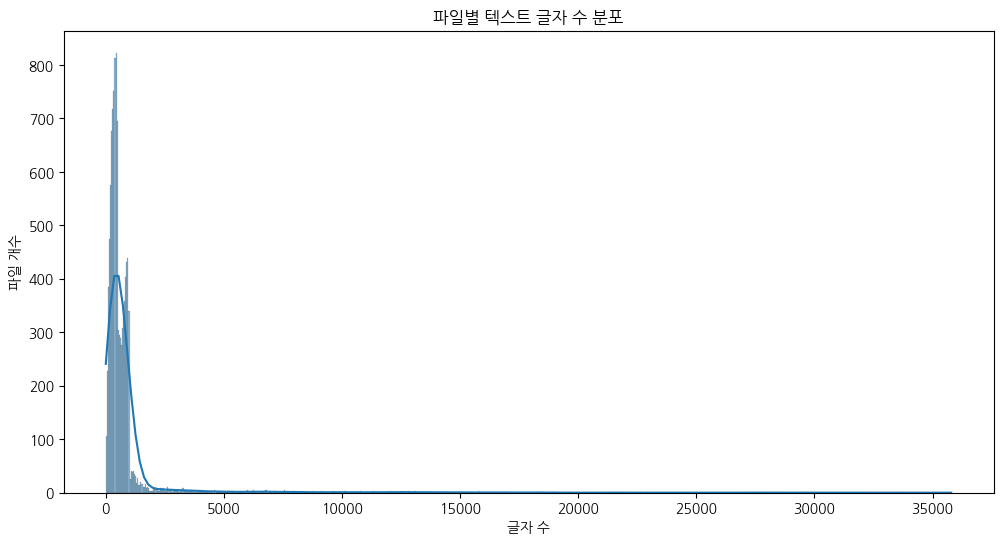

In [4]:
# --- 데이터 불러오기 및 전처리 ---
try:
    # CSV 파일을 pandas DataFrame으로 읽어옵니다.
    print(f"'{file_path}' 파일을 읽는 중입니다...")
    df = pd.read_csv(file_path)
    print("파일을 성공적으로 읽었습니다.")

    # 'text' 컬럼에 결측치(NaN)가 있을 경우, 빈 문자열로 대체합니다.
    df["text"] = df["text"].fillna("")

    # file_name을 기준으로 그룹화하고, 각 그룹의 'text'를 하나의 문자열로 합칩니다.
    print("동일한 'file_name'을 기준으로 텍스트를 합치는 중입니다...")
    merged_text_series = df.groupby("file_name")["text"].apply("".join)

    # 합쳐진 텍스트의 글자 수를 계산하여 새로운 'text_length' 컬럼을 만듭니다.
    # .str.len()을 사용하여 각 문자열의 길이를 계산합니다.
    text_lengths = merged_text_series.str.len()

    # 글자 수 통계를 보기 쉽게 DataFrame으로 변환합니다.
    text_lengths_df = text_lengths.reset_index(name="text_length")
    print("글자 수 계산을 완료했습니다.\n")

    # --- 통계 출력 ---
    print("--- 글자 수 기술 통계 ---")
    # .describe()를 사용하여 주요 통계(개수, 평균, 표준편차, 최소값, 사분위수, 최대값)를 출력합니다.
    print(text_lengths_df["text_length"].describe())
    print("-" * 25)

    # 가장 글자 수가 적은 상위 5개 파일 정보 출력
    print("\n--- 글자 수가 가장 적은 상위 5개 파일 ---")
    print(text_lengths_df.sort_values(by="text_length").head())
    print("-" * 25)

    # 가장 글자 수가 많은 상위 5개 파일 정보 출력
    print("\n--- 글자 수가 가장 많은 상위 5개 파일 ---")
    print(text_lengths_df.sort_values(by="text_length", ascending=False).head())
    print("-" * 25)

    # --- 분포 시각화 ---
    print("\n글자 수 분포를 시각화합니다...")
    # 그래프의 전체 크기를 설정합니다.
    plt.figure(figsize=(12, 6))

    # seaborn의 histplot을 사용하여 히스토그램을 그립니다.
    # kde=True 옵션은 밀도 추정 곡선을 함께 표시합니다.
    sns.histplot(data=text_lengths_df, x="text_length", kde=True)

    # 그래프 제목과 축 레이블을 설정합니다.
    plt.title("파일별 텍스트 글자 수 분포")
    plt.xlabel("글자 수")
    plt.ylabel("파일 개수")

    # 그래프를 화면에 보여줍니다.
    plt.show()

except FileNotFoundError:
    print(f"[오류] 파일을 찾을 수 없습니다: '{file_path}'")
    print("파일 경로를 다시 확인해주세요.")
except Exception as e:
    print(f"[오류] 코드를 실행하는 중 문제가 발생했습니다: {e}")

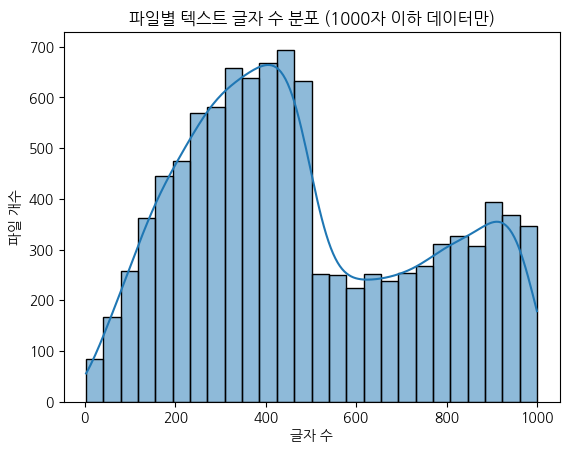

In [5]:
# 1000자 이하만 필터링
filtered_df = text_lengths_df[text_lengths_df["text_length"] <= 1000]

sns.histplot(data=filtered_df, x="text_length", kde=True)
plt.title("파일별 텍스트 글자 수 분포 (1000자 이하 데이터만)")
plt.xlabel("글자 수")
plt.ylabel("파일 개수")
plt.show()

In [6]:
# 전체 데이터 수
total_count = len(text_lengths_df)

# 1000자 이하인 데이터 수
under_1000_count = (text_lengths_df["text_length"] <= 1000).sum()

# 비율 계산 (%)
under_1000_ratio = (under_1000_count / total_count) * 100

print(f"총 파일 수: {total_count}")
print(f"1000자 이하 파일 수: {under_1000_count}")
print(f"비율: {under_1000_ratio:.2f}%")

총 파일 수: 11019
1000자 이하 파일 수: 10019
비율: 90.92%


In [7]:
merged_text_series.head(5)

file_name
2_0001G2A3_0005G2A6_T2_2D06T0247C000506_000138.json    여보세요여보세요여기요안녕하세요네 안녕하세요오늘은 패스트푸드에 피자에 대해서 얘기를 ...
2_0001G2A3_0005G2A6_T2_2D10T0449C000464_000158.json    에안녕하세요얼마아 네 안녕하세요 오늘은 무척 늦었어요소리가 잘 들려서요어우 잘 들리...
2_0002G2A3_0003G2A5_T1_2D03T0108C000324_000349.json    반갑습니다미래에 반갑습니다 잘 지내셨죠네 잘 지내고 있어요더운데 요즘은 뭐를 해서 ...
2_0004G2A2_0005G2A6_T2_2D06T0220C000376_000261.json    여보세아 여보세요?아 잘 들려? 어 안녕하세요?어 안녕하세요, 잘 들립니까?네. 아...
2_0004G2A2_0008G1A6_T2_2D06T0241C000581_000168.json    아 안녕하세요안녕하세요 통화가 잘 안됐었는데 잘 부탁드립니다아그럼 잘 부탁드립니다아...
Name: text, dtype: object

In [8]:
merged_text_series.info()

<class 'pandas.core.series.Series'>
Index: 11019 entries, 2_0001G2A3_0005G2A6_T2_2D06T0247C000506_000138.json to S038329.json
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
11019 non-null  object
dtypes: object(1)
memory usage: 172.2+ KB



--- 글자 수 분포 (500자 단위) ---
       글자 수 범위  파일 개수
      [0, 500)   6211
   [500, 1000)   3798
  [1000, 1500)    311
  [1500, 2000)    102
  [2000, 2500)     72
  [2500, 3000)     59
  [3000, 3500)     51
  [3500, 4000)     39
  [4000, 4500)     28
  [4500, 5000)     28
  [5000, 5500)     19
  [5500, 6000)     13
  [6000, 6500)     24
  [6500, 7000)     23
  [7000, 7500)     13
  [7500, 8000)     20
  [8000, 8500)     14
  [8500, 9000)      7
  [9000, 9500)      9
 [9500, 10000)     12
[10000, 10500)      9
[10500, 11000)     10
[11000, 11500)     10
[11500, 12000)      6
[12000, 12500)     12
[12500, 13000)     14
[13000, 13500)      8
[13500, 14000)      4
[14000, 14500)     10
[14500, 15000)      8
[15000, 15500)      5
[15500, 16000)      5
[16000, 16500)      5
[16500, 17000)      6
[17000, 17500)      2
[17500, 18000)      4
[18000, 18500)      5
[18500, 19000)      4
[19000, 19500)      1
[19500, 20000)      3
[20000, 20500)      1
[20500, 21000)      1
[21000, 21500)      1
[2150

C:\Users\user\AppData\Local\Temp\ipykernel_7812\4276076699.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=distribution.index.astype(str), y=distribution.values, palette='viridis')


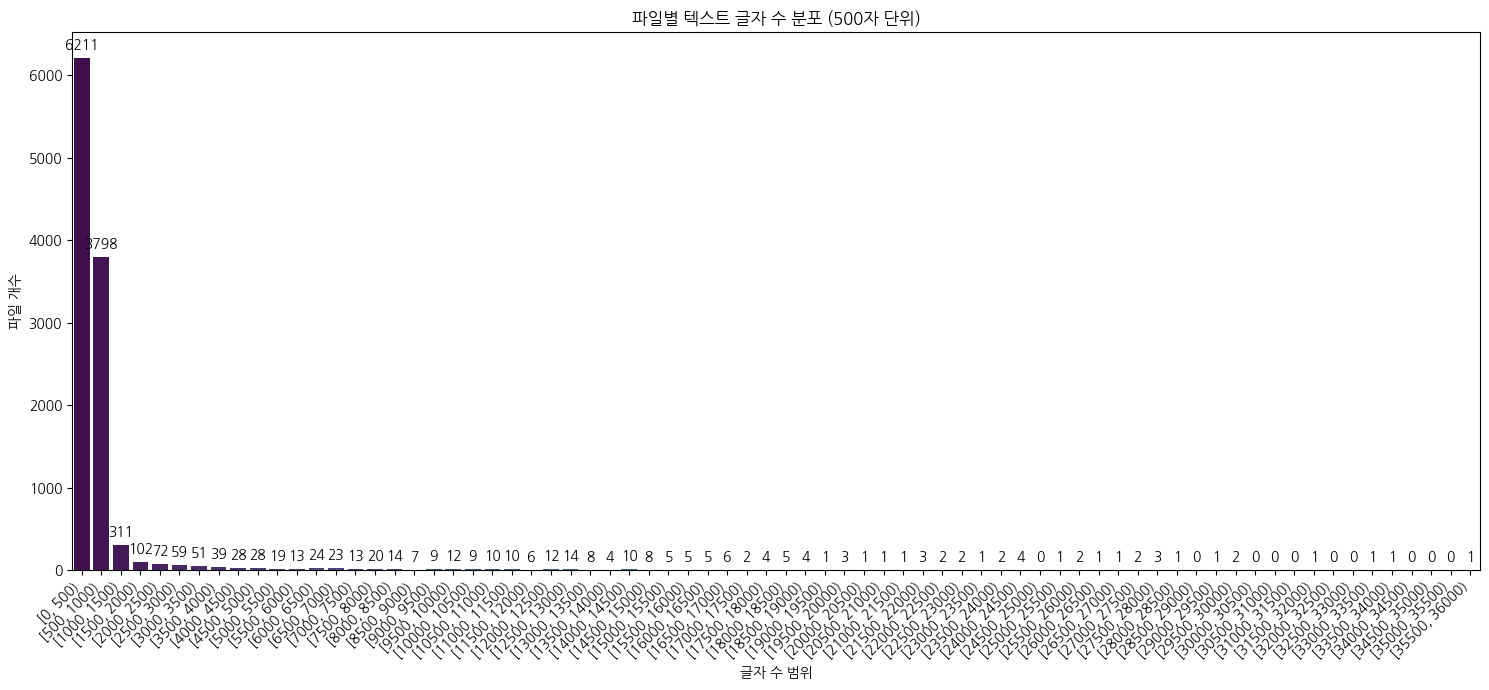

In [9]:
# --- 500 단위로 그룹화 (Binning) ---
# 가장 긴 글자 수를 찾아 구간의 최댓값으로 설정합니다.
max_length = text_lengths.max()

# 0부터 최대 글자 수까지 500 단위로 구간을 나눌 기준(bins)을 생성합니다.
# 예: max_length가 1200이면 bins는 [0, 500, 1000, 1500]이 됩니다.
bins = np.arange(0, max_length + 500, 500)

# pd.cut 함수를 사용하여 각 파일의 글자 수가 어느 구간에 속하는지 나눕니다.
# right=False 옵션은 각 구간의 오른쪽 경계를 포함하지 않도록 합니다. (예: [0, 500) -> 0~499)
binned_lengths = pd.cut(text_lengths, bins=bins, right=False)

 # 각 구간(bin)에 속하는 파일의 개수를 계산하고, 구간 순서대로 정렬합니다.
distribution = binned_lengths.value_counts().sort_index()

# --- 결과 출력 (표) ---
print("\n--- 글자 수 분포 (500자 단위) ---")
# 보기 쉽게 DataFrame으로 변환하여 출력합니다.
distribution_df = distribution.reset_index()
distribution_df.columns = ['글자 수 범위', '파일 개수']
print(distribution_df.to_string(index=False))
print("-" * 35)

# --- 시각화 (막대 그래프) ---
print("\n글자 수 분포를 막대 그래프로 시각화합니다...")
# 그래프 크기를 설정합니다.
plt.figure(figsize=(15, 7))

# seaborn의 barplot을 사용하여 막대 그래프를 그립니다.
# x축은 문자열로 변환된 구간 정보, y축은 해당 구간의 파일 개수입니다.
ax = sns.barplot(x=distribution.index.astype(str), y=distribution.values, palette='viridis')

# 그래프 제목과 축 레이블을 설정합니다.
plt.title('파일별 텍스트 글자 수 분포 (500자 단위)')
plt.xlabel('글자 수 범위')
plt.ylabel('파일 개수')

# x축 레이블(구간)이 많을 경우 겹치지 않도록 45도 회전시킵니다.
plt.xticks(rotation=45, ha='right')

# 각 막대 위에 파일 개수를 표시합니다.
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# 레이아웃을 조정하여 레이블이 잘리지 않도록 합니다.
plt.tight_layout()
# 그래프를 화면에 보여줍니다.
plt.show()




In [10]:
# 전체 수
total_count = len(text_lengths_df)

# 100글자 단위 구간 만들기 (0~1000 포함)
bins = list(range(0, 1100, 100))  # [0,100,200,...,1000]
labels = [f"{i}~{i+99}" for i in bins[:-1]]  # ['0~99', '100~199', ..., '900~999']

# 구간에 맞게 범주화
text_lengths_df["range"] = pd.cut(
    text_lengths_df["text_length"],
    bins=bins,
    labels=labels,
    right=False,  # 100 포함 안 함 → 0~99, 100~199 식
)

# 구간별 개수와 비율 계산
range_stats = text_lengths_df["range"].value_counts().sort_index().reset_index()
range_stats.columns = ["구간", "파일 수"]
range_stats["비율(%)"] = (range_stats["파일 수"] / total_count * 100).round(2)

# 출력
print(range_stats)

        구간  파일 수  비율(%)
0     0~99   371   3.37
1  100~199  1010   9.17
2  200~299  1398  12.69
3  300~399  1684  15.28
4  400~499  1748  15.86
5  500~599   643   5.84
6  600~699   633   5.74
7  700~799   720   6.53
8  800~899   845   7.67
9  900~999   957   8.68


In [ ]:
from konlpy.tag import Komoran

# Komoran 객체 생성
komoran = Komoran()

# 추출할 품사 태그
target_tags = ["NNG", "NNP", "VV", "VA", "IC"]


def komoran_tokenizer(text):
    pos = komoran.pos(text)
    keywords = [word for word, tag in pos if tag in target_tags]
    # "네", "예"가 원문에 있고 결과에 없으면 추가
    for ex in ["네", "예"]:
        if ex in text and ex not in keywords:
            keywords.append(ex)
    # "OOO"가 있으면 제거
    keywords = [word for word in keywords if word != "OOO"]
    # 빈 리스트면 '없음'으로 반환
    return keywords if keywords else ["없음"]


# 데이터프레임 전체에 적용 (새 컬럼 생성 또는 덮어쓰기)
df["komoran_tokens"] = df["text"].apply(komoran_tokenizer)

In [42]:
from collections import Counter


def get_keyword_freq_filtered(df, column_name="komoran_tokens", min_freq=10):
    # 모든 키워드 리스트를 하나로 합침
    all_keywords = [keyword for sublist in df[column_name] for keyword in sublist]
    # 키워드 빈도수 계산
    keyword_counts = Counter(all_keywords)
    # 데이터프레임으로 변환
    keyword_freq_df = pd.DataFrame(
        keyword_counts.items(), columns=["keyword", "frequency"]
    )
    # min_freq 미만 제거 및 내림차순 정렬
    keyword_freq_df_filtered = (
        keyword_freq_df[keyword_freq_df["frequency"] >= min_freq]
        .sort_values(by="frequency", ascending=False)
        .reset_index(drop=True)
    )
    return keyword_freq_df_filtered


# 사용 예시
filtered_df = get_keyword_freq_filtered(df)
print(filtered_df.head(100))

   keyword  frequency
0        네      89216
1        하      67212
2        되      57743
3        아      44156
4        있      30882
5       확인      28223
6        예      28209
7        어      27265
8       그렇      22924
9        같      19355
10      교재      18700
11      감사      18305
12      드리      18234
13      환불      17785
14       보      16657
15      회원      16309
16      제가      16124
17       알      14713
18      결제      13222
19      말씀      13005
20      어떻      12617
21       맞      11926
22       받      11821
23       없      11749
24       걸      11397
25      취소      10875
26      없음      10622
27       때       9744
28       일       9410
29       게       9247
30       가       8791
31       음       8332
32      이렇       8132
33       좋       8099
34       이       8028
35      구매       7651
36       오       7510
37      시간       7482
38     기다리       7321
39      아이       7308
40      생각       7097
41      전화       7081
42      보내       6981
43       들       6926
44       말

In [11]:
from konlpy.tag import Kkma
# 형태소 분석기 객체 생성
kkma = Kkma()


# 형태소 분석 함수 (불용어 제거 없이 주요 품사만 필터링)
def kkma_tokenizer(text):
    try:
        tokens = kkma.pos(text)
        # 명사(NNG, NNP), 동사(VV), 형용사(VA)만 추출
        keywords = [word for word, tag in tokens if tag in ["NNG", "NNP", "VV", "VA"]]
        return keywords if keywords else ["없음"]
    except:
        return ["오류"]


# 적용
df["kkma_tokens"] = df["text"].apply(kkma_tokenizer)

# 결과 출력
# print(df)

In [ ]:
from collections import Counter
import pandas as pd

# 모든 키워드를 하나의 리스트로 합치기
all_keywords = sum(df["kkma_tokens"], [])  # 리스트 안 리스트를 평탄화

# 키워드 등장 빈도수 계산
keyword_counter = Counter(all_keywords)

# Counter → DataFrame 변환
keyword_freq_df = pd.DataFrame(
    keyword_counter.items(), columns=["keyword", "frequency"]
)

# 내림차순 정렬
keyword_freq_df = keyword_freq_df.sort_values(
    by="frequency", ascending=False
).reset_index(drop=True)

# 출력
# print(keyword_freq_df)
# 상위 700개 키워드만 추출
top_700_keywords = keyword_freq_df.head(700)

# 결과 확인
print(top_700_keywords)



    keyword  frequency
0         하      75408
1         되      58728
2         아      40011
3         있      37516
4         어      29153
5        확인      28219
6        그러      23216
7         알      21151
8        감사      18307
9         같      18151
10       교재      18111
11        보      17868
12       환불      17401
13       회원      16286
14        그      15953
15       드리      15282
16       지금      14681
17       없음      14630
18        예      13089
19       결제      13078
20       어떻      13007
21        맞      11372
22       그렇      11343
23        없      11245
24        받      10838
25       취소      10790
26      그리하      10337
27       제가      10288
28        가      10149
29        때      10047
30       가능       9456
31        좋       9184
32       이제       9141
33        일       9131
34        오       8812
35       구매       7604
36       시간       7421
37       잠시       7418
38       전화       7334
39      기다리       7321
40       생각       7227
41       말씀       6986
42        듣

In [13]:
# top_700_keywords를 CSV 파일로 저장
top_700_keywords.to_csv("top_700_keywords.csv", index=False, encoding="utf-8-sig")